In [1]:
import numpy as np
import csv
from ripser import ripser
from persim import plot_diagrams


def deepmap(fn, mylist):
  """
  Finds the deepest nested values that aren't lists in
  order to apply the mapping function to them
  """
  if (len(mylist) == 0):
    return mylist
  elif (type(mylist[0]) == list):
    return list(map(lambda x: deepmap(fn, x), mylist))
  else:
    return list(map(fn, mylist))


def stringCSVDataToFloats(data):
  """
  Takes a csv.reader object and returns a list
  where the values are no longer string but instead
  floats
  """
  return deepmap(float, list(data))


def useableArray(data):
  """
  Takes our datasets, which are csv files, converts 
  values to floats, then transposes so that data is 
  grouped properly
  """
  data = stringCSVDataToFloats(data)
  data = np.array(data)
  data = data.transpose()
  return data



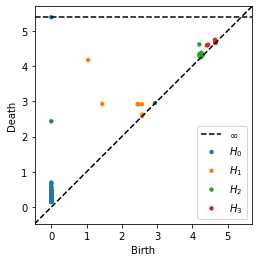

In [2]:
with open('data/anthony_iso.csv', newline='') as csv_file:
  data = csv.reader(csv_file)
  data = useableArray(data)

  diagrams = ripser(data[0:100], maxdim=3)['dgms']
  plot_diagrams(diagrams, show=True)